In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import nltk

import gensim
import sklearn
"""
from gensim import corpora, models, similarities
from gensim.utils import smart_open, simple_preprocess
from gensim.matutils import corpus2csc
from gensim.parsing.preprocessing import STOPWORDS
"""
import pyLDAvis
pyLDAvis.enable_notebook()
import pyLDAvis.gensim

In [2]:
sns.set_context("poster")
sns.set_style("ticks")

In [3]:
print "Numpy version: ", np.__version__
print "Pandas version: ", pd.__version__
print "Matplotlib version: ", plt.matplotlib.__version__
print "Seaborn version: ", sns.__version__
print "Sklearn version: ", sklearn.__version__
print "NLTK version: ", nltk.__version__
print "Gensim version: ", gensim.__version__
print "PyLDAvis version: ", pyLDAvis.__version__

Numpy version:  1.11.2
Pandas version:  0.19.0
Matplotlib version:  1.5.3
Seaborn version:  0.7.1
Sklearn version:  0.18
NLTK version:  3.2.1
Gensim version:  0.12.4
PyLDAvis version:  2.0.0


## NLTK checks

More details at: http://www.nltk.org/

In [4]:
nltk.download("movie_reviews")

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /homed/smishra8/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [5]:
from nltk.corpus import movie_reviews

In [6]:
movie_reviews.categories()

[u'neg', u'pos']

In [7]:
movie_reviews.words()

[u'plot', u':', u'two', u'teen', u'couples', u'go', ...]

In [8]:
sents = movie_reviews.sents()

In [9]:
len(sents)

71532

In [10]:
sents[0]

[u'plot',
 u':',
 u'two',
 u'teen',
 u'couples',
 u'go',
 u'to',
 u'a',
 u'church',
 u'party',
 u',',
 u'drink',
 u'and',
 u'then',
 u'drive',
 u'.']

In [11]:
for i, s in enumerate(sents[:10]):
    print "S[%s]:\t%s" % (i, " ".join(s))

S[0]:	plot : two teen couples go to a church party , drink and then drive .
S[1]:	they get into an accident .
S[2]:	one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares .
S[3]:	what ' s the deal ?
S[4]:	watch the movie and " sorta " find out .
S[5]:	.
S[6]:	.
S[7]:	critique : a mind - fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package .
S[8]:	which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn ' t snag this one correctly .
S[9]:	they seem to have taken this pretty neat concept , but executed it terribly .


## Gensim checks
More details at: https://radimrehurek.com/gensim/

In [12]:
bigrams = gensim.models.Phrases(sents[:100])

In [13]:
bigrams.vocab.items()[0:10]

[('of_making', 1),
 ('and_most', 1),
 ('mir_)', 1),
 ('keeping_score', 1),
 ('"_into', 1),
 ('before_it', 1),
 ('the_tale', 1),
 ('they_are', 4),
 ('i_checked', 1),
 ('poorly', 2)]

In [14]:
sorted(bigrams.vocab.iteritems(), key=lambda x: x[1], reverse=True)[:10]

[(',', 116),
 ('the', 112),
 ('.', 86),
 ("'", 67),
 ('and', 50),
 ('a', 47),
 ('of', 46),
 ('it', 45),
 ("'_s", 40),
 ('s', 40)]

In [15]:
word_frequencies = map(lambda x: x[1], bigrams.vocab.iteritems())

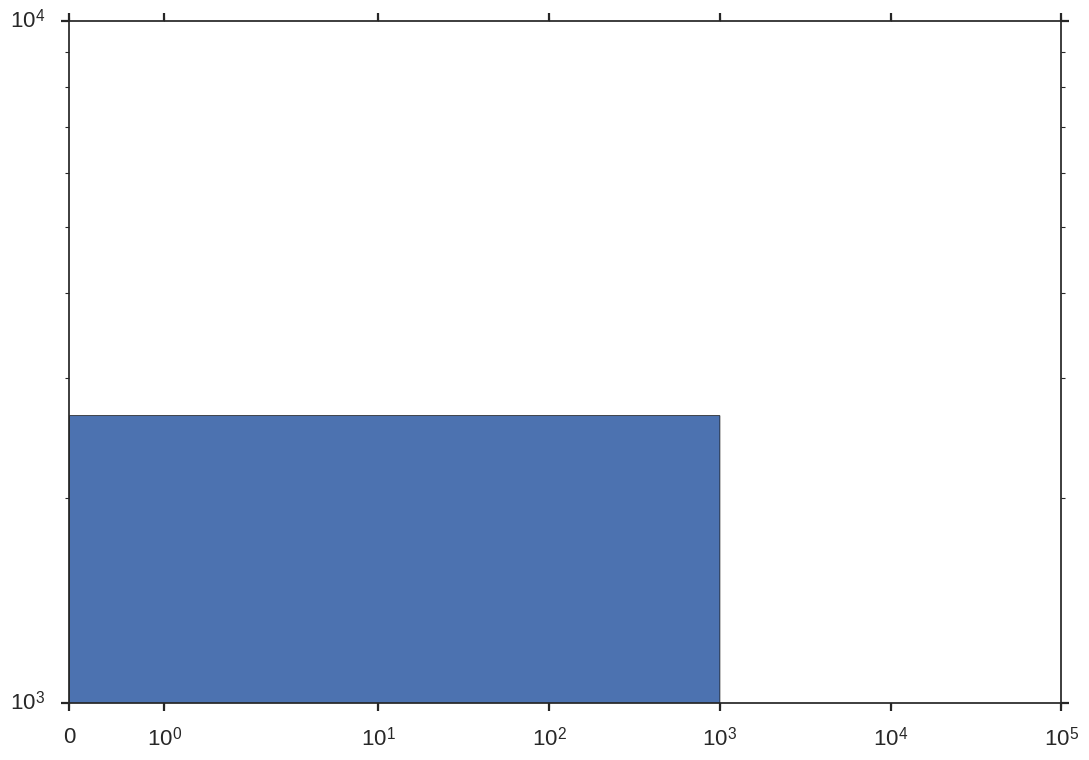

In [16]:
plt.hist(word_frequencies, bins=range(0,70000, 1000), log=True)
plt.xscale("symlog")

In [17]:
sorted(filter(lambda x: isinstance(x[0], str) and "_" in x[0], 
        bigrams.vocab.iteritems()), key=lambda x: x[1], reverse=True)[:30]

[("'_s", 40),
 ("'_t", 16),
 (',_and', 13),
 (',_but', 11),
 ("it_'", 10),
 ('the_film', 9),
 ('there_are', 9),
 ('that_the', 8),
 ('of_the', 8),
 ('/_10', 8),
 ('10_)', 8),
 (',_it', 8),
 (')_-', 7),
 ("don_'", 7),
 (',_there', 6),
 (')_,', 6),
 ('with_the', 6),
 (',_the', 6),
 ('film_is', 6),
 ('and_the', 5),
 ('for_the', 5),
 ('they_are', 4),
 ('the_movie', 4),
 ('the_characters', 4),
 ('in_a', 4),
 ('this_film', 4),
 ('on_the', 4),
 (',_as', 4),
 ('most_of', 4),
 ('of_a', 4)]

In [18]:
corpus = bigrams[sents[:100]]
id2word = gensim.corpora.Dictionary(corpus)

In [19]:
len(id2word.keys())

804

In [20]:
corpus_processed = [id2word.doc2bow(k) for k in corpus]
print len(corpus_processed)

100


In [21]:
corpus_processed[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1)]

In [22]:
corpus[0]

[u'plot',
 u':',
 u'two',
 u'teen',
 u'couples',
 u'go',
 u'to',
 u'a',
 u'church',
 u'party',
 u',',
 u'drink',
 u'and',
 u'then',
 u'drive',
 u'.']

In [23]:
LDA_model = gensim.models.ldamodel.LdaModel(corpus_processed, num_topics=10, id2word=id2word)

In [24]:
LDA_model.print_topics()

[(0,
  u'0.030*to + 0.026*the + 0.025*it + 0.017*. + 0.016*on + 0.015*, + 0.014*that + 0.012*- + 0.010*" + 0.010*us'),
 (1,
  u'0.039*, + 0.036*. + 0.031*the + 0.025*a + 0.022*to + 0.022*of + 0.020*and + 0.016*is + 0.014*in + 0.013*film'),
 (2,
  u'0.053*, + 0.043*the + 0.022*. + 0.021*it + 0.021*a + 0.020*\'_s + 0.019*and + 0.018*of + 0.017*" + 0.014*in'),
 (3,
  u'0.046*. + 0.026*the + 0.022*and + 0.021*" + 0.018*are + 0.015*, + 0.015*they + 0.014*to + 0.012*as + 0.012*\'_t'),
 (4,
  u"0.047*the + 0.046*, + 0.033*. + 0.029*a + 0.024*of + 0.018*- + 0.016*and + 0.015*'_s + 0.013*movie + 0.012*("),
 (5,
  u"0.019*from + 0.017*! + 0.016*, + 0.013*'_s + 0.009*it + 0.009*the + 0.009*coming + 0.009*? + 0.009*where + 0.009*joblo"),
 (6,
  u'0.013*, + 0.011*it + 0.010*concept + 0.010*. + 0.010*pretty + 0.010*to + 0.010*have + 0.010*seem + 0.010*taken + 0.010*neat'),
 (7,
  u'0.008*to + 0.008*the + 0.007*is + 0.007*of + 0.006*, + 0.005*" + 0.005*it + 0.004*. + 0.004*an + 0.004*showmanship'),
 

In [25]:
LDA_model.get_document_topics(corpus_processed[0])

[(4, 0.94705370792200227)]

In [26]:
doc_topics = LDA_model[corpus_processed]

In [27]:
doc_topics[1]

[(0, 0.014285974106823539),
 (1, 0.014287095451446376),
 (2, 0.014287482059759993),
 (3, 0.87141916727490265),
 (4, 0.014288223663307119),
 (5, 0.014285724335599888),
 (6, 0.014286101434451703),
 (7, 0.014285968846338315),
 (8, 0.014286409645002111),
 (9, 0.014287853182368462)]

In [28]:
pyLDAvis.gensim.prepare(LDA_model, corpus_processed,
                        id2word)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
9      25.910044        1       1  0.062984 -0.037186
4      21.706515        1       2  0.081099 -0.041623
2      13.736768        1       3  0.068655 -0.011713
3      10.950379        1       4  0.002043  0.135704
1      10.755028        1       5  0.053291  0.004742
8       8.161868        1       6  0.031437  0.007277
0       5.689251        1       7 -0.049601  0.008168
5       1.678223        1       8 -0.104005 -0.042601
6       1.018043        1       9 -0.080729 -0.016311
7       0.393880        1      10 -0.065174 -0.006456, topic_info=     Category       Freq       Term      Total  loglift  logprob
term                                                            
15    Default  27.000000         to  27.000000  30.0000  30.0000
547   Default  34.000000         it  34.000000  29.0000  29.0000
221   Default  93.000000          ,  93.000000  28.0000  28.0000
545   Default  29.000000         is  29.000000  27.0000  27.0000
107   Default   8.000000       from   8.000000  26.0000  26.0000
311   Default  23.000000          "  23.000000  25.0000  25.0000
510   Default  68.000000          .  68.000000  24.0000  24.0000
237   Default   8.000000       they   8.000000  23.0000  23.0000
666   Default  10.000000        for  10.000000  22.0000  22.0000
626   Default  32.000000        '_s  32.000000  21.0000  21.0000
791   Default   7.000000  there_are   7.000000  20.0000  20.0000
419   Default   5.000000     pretty   5.000000  19.0000  19.0000
136   Default  13.000000       this  13.000000  18.0000  18.0000
693   Default  14.000000         on  14.000000  17.0000  17.0000
734   Default  11.000000        but  11.000000  16.0000  16.0000
458   Default  11.000000      movie  11.000000  15.0000  15.0000
697   Default  36.000000         of  36.000000  14.0000  14.0000
586   Default   7.000000          i   7.000000  13.0000  13.0000
454   Default   9.000000        are   9.000000  12.0000  12.0000
553   Default  15.000000         in  15.000000  11.0000  11.0000
351   Default  40.000000        and  40.000000  10.0000  10.0000
594   Default  91.000000        the  91.000000   9.0000   9.0000
740   Default  13.000000       with  13.000000   8.0000   8.0000
598   Default   5.000000       just   5.000000   7.0000   7.0000
678   Default   8.000000          ?   8.000000   6.0000   6.0000
355   Default   2.000000       have   2.000000   5.0000   5.0000
623   Default  13.000000        '_t  13.000000   4.0000   4.0000
640   Default   4.000000         --   4.000000   3.0000   3.0000
189   Default  38.000000          a  38.000000   2.0000   2.0000
159   Default   1.000000          !   1.000000   1.0000   1.0000
...       ...        ...        ...        ...      ...      ...
143   Topic10   0.014529     making   1.394750   0.9726  -6.4147
529   Topic10   0.009381      plain   0.900671   0.9724  -6.8522
308   Topic10   0.009381    visions   0.900686   0.9724  -6.8522
184   Topic10   0.014498       such   1.403594   0.9641  -6.4169
73    Topic10   0.029112     disney   2.879896   0.9425  -5.7197
511   Topic10   0.019130     secret   1.894545   0.9414  -6.1396
165   Topic10   0.014223      write   1.403331   0.9451  -6.4360
41    Topic10   0.013939     flashy   1.384583   0.9384  -6.4562
628   Topic10   0.029647      quest   3.269999   0.8337  -5.7015
130   Topic10   0.017024      given   1.825039   0.8622  -6.2562
215   Topic10   0.017414     before   1.967587   0.8096  -6.2336
15    Topic10   0.073855         to  27.960570  -0.3996  -4.7888
172   Topic10   0.027520         if   4.599781   0.4180  -5.7760
762   Topic10   0.036476         an   7.910668   0.1576  -5.4942
714   Topic10   0.021220       your   2.951150   0.6019  -6.0360
545   Topic10   0.063980         is  29.954654  -0.6120  -4.9323
697   Topic10   0.059903         of  36.971819  -0.8883  -4.9982
311   Topic10   0.048238          "  23.926411  -0.6697  -5

## Wordnet

More details at: 
* http://www.nltk.org/howto/wordnet.html
* https://wordnet.princeton.edu/

In [29]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     /homed/smishra8/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
from nltk.corpus import wordnet as wn

In [31]:
wn.synsets('dog')

[Synset('dog.n.01'),
 Synset('frump.n.01'),
 Synset('dog.n.03'),
 Synset('cad.n.01'),
 Synset('frank.n.02'),
 Synset('pawl.n.01'),
 Synset('andiron.n.01'),
 Synset('chase.v.01')]

## Sentiwordnet

More details at: 
* http://www.nltk.org/howto/sentiwordnet.html
* http://sentiwordnet.isti.cnr.it/

In [32]:
nltk.download("sentiwordnet")

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /homed/smishra8/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


True

In [33]:
from nltk.corpus import sentiwordnet as swn

In [34]:
breakdown = swn.senti_synset('breakdown.n.03')
print breakdown

<breakdown.n.03: PosScore=0.0 NegScore=0.25>


## POS Tagging

In [35]:
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /homed/smishra8/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [36]:
text = nltk.word_tokenize("And now for something completely different")
nltk.pos_tag(text)
    

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

## Named Entity Recognition

In [37]:
nltk.download(["maxent_ne_chunker", "words", "stopwords"])

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /homed/smishra8/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /homed/smishra8/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /homed/smishra8/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
text = nltk.word_tokenize("US president Barack Obama signed a new treaty with the Indian prime minister Narendra Modi, in New Delhi.")
pos_tags = nltk.pos_tag(text)
print pos_tags

[('US', 'NNP'), ('president', 'NN'), ('Barack', 'NNP'), ('Obama', 'NNP'), ('signed', 'VBD'), ('a', 'DT'), ('new', 'JJ'), ('treaty', 'NN'), ('with', 'IN'), ('the', 'DT'), ('Indian', 'JJ'), ('prime', 'JJ'), ('minister', 'NN'), ('Narendra', 'NNP'), ('Modi', 'NNP'), (',', ','), ('in', 'IN'), ('New', 'NNP'), ('Delhi', 'NNP'), ('.', '.')]


In [39]:
try:
    chunk_tags = nltk.ne_chunk(pos_tags, binary=False)
except:
    print "Done"
print chunk_tags

(S
  (GPE US/NNP)
  president/NN
  (PERSON Barack/NNP Obama/NNP)
  signed/VBD
  a/DT
  new/JJ
  treaty/NN
  with/IN
  the/DT
  (GPE Indian/JJ)
  prime/JJ
  minister/NN
  (PERSON Narendra/NNP Modi/NNP)
  ,/,
  in/IN
  (GPE New/NNP Delhi/NNP)
  ./.)
